In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
emails_df = pd.read_csv('/content/email.csv')

In [ ]:
emails_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
def custom_clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    return tokens
emails_df['Cleaned_Tokens'] = df['Message'].apply(custom_clean_and_tokenize)
emails_df[['Category', 'Message', 'Cleaned_Tokens']].head()


,Category,Message,Cleaned_Tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Message').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Message'].value_counts()
    for x_label, grp in _df_2.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Message')

In [ ]:
emails_df.dropna(inplace=True)
emails_df.isnull().sum()

,0
Category,0
Message,0
Cleaned_Tokens,0


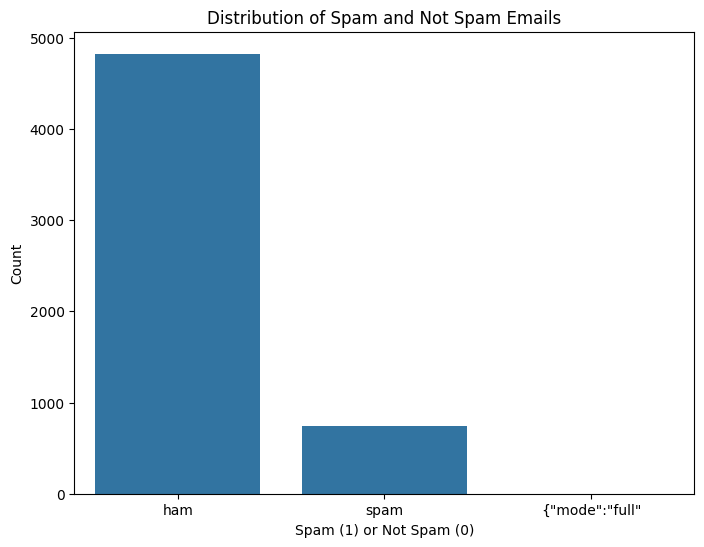

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=emails_df)
plt.title('Distribution of Spam and Not Spam Emails')
plt.xlabel('Spam (1) or Not Spam (0)')
plt.ylabel('Count')
plt.show()


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails_df['Category'])
y = emails_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred_nb = nb_classifier.predict(X_test)

In [ ]:
y_pred_nb

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',


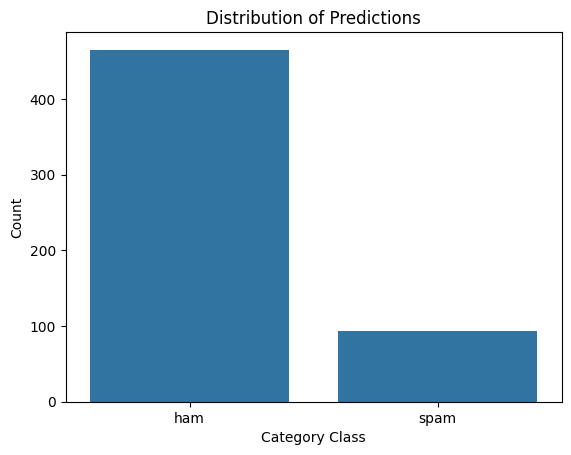

In [ ]:
sns.countplot(x=y_pred_nb)
plt.title('Distribution of Predictions')
plt.xlabel('Category Class')
plt.ylabel('Count')
plt.show()


In [ ]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_classification_report)


Naive Bayes Classifier:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00       465
        spam       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
y_pred_svm

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',


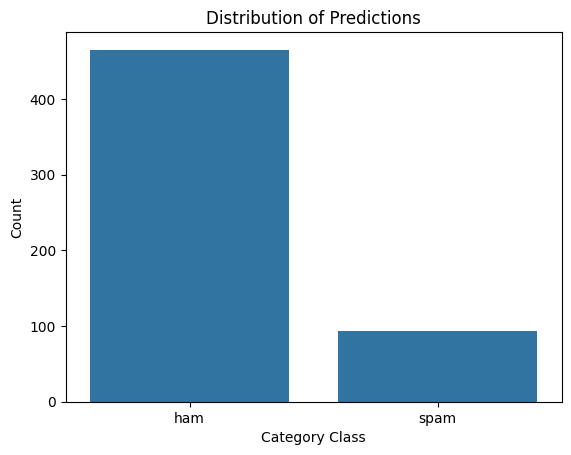

In [ ]:
sns.countplot(x=y_pred_svm)
plt.title('Distribution of Predictions')
plt.xlabel('Category Class')
plt.ylabel('Count')
plt.show()

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Classifier")
print("Accuracy: ", svm_accuracy)
print("Classification Report:", svm_classification_report)


Support Vector Machine Classifier
Accuracy:  1.0
Classification Report:               precision    recall  f1-score   support

         ham       1.00      1.00      1.00       465
        spam       1.00      1.00      1.00        93

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



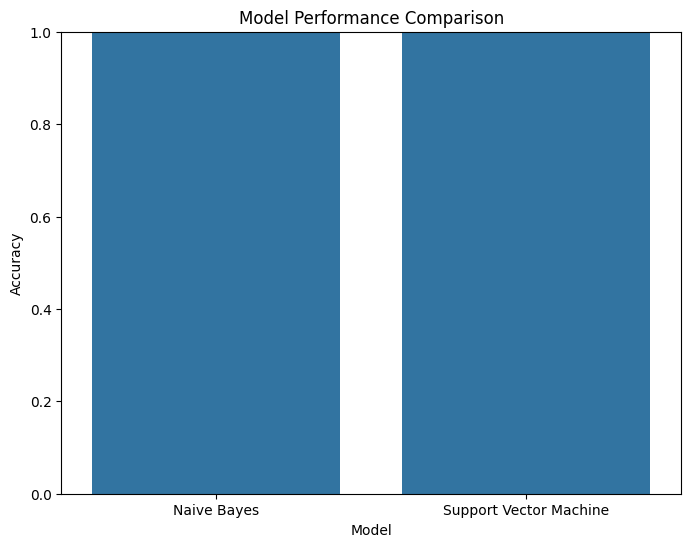

In [ ]:
model_perfomance = pd.DataFrame({
    'Model': ['Naive Bayes', 'Support Vector Machine'],
    'Accuracy': [nb_accuracy, svm_accuracy]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_perfomance)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()